In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Part A

In [3]:
df=pd.read_csv('customer_data.csv')
print(df.columns)

Index(['customer_id', 'full_name', 'age', 'annual_income', 'spending_score',
       'num_transactions', 'last_purchase_days', 'city'],
      dtype='object')


In [4]:
df.dtypes


customer_id            int64
full_name             object
age                    int64
annual_income          int64
spending_score         int64
num_transactions       int64
last_purchase_days     int64
city                  object
dtype: object

In [5]:
nill=df.isnull().sum()
nill

customer_id           0
full_name             0
age                   0
annual_income         0
spending_score        0
num_transactions      0
last_purchase_days    0
city                  0
dtype: int64

In [6]:
duplicates=df.duplicated().sum()
print(duplicates)

0


In [7]:
df['first_name']=df['full_name'].str.split().str[0]
df['first_name'].head()

0        Emily
1     Patricia
2      Michael
3    Elizabeth
4       Sophia
Name: first_name, dtype: object

In [8]:
df['city']=df['city'].str.upper()
df['city'].head()

0      MIAMI
1    PHOENIX
2    CHICAGO
3    CHICAGO
4    CHICAGO
Name: city, dtype: object

Part B

In [9]:
stat=df['age'].agg(['mean','median','std','var'])
stat1=df['age'].mode()
print("statistics\n")
print(stat)
print("\nmode")
print(stat1)
count=df['age'].value_counts()
count.head()

statistics

mean       42.660000
median     44.500000
std        11.863891
var       140.751919
Name: age, dtype: float64

mode
0    52
1    54
Name: age, dtype: int64


age
54    8
52    8
60    4
49    4
39    4
Name: count, dtype: int64

In [10]:
stats=df['annual_income'].agg(['mean','median','std','var'])
stats1=df['annual_income'].mode()
print("statistics\n")
print(stats)
print("\nmode")
print(stats1)
countss=df['annual_income'].value_counts()
countss.head()

statistics

mean      7.607689e+04
median    8.031800e+04
std       2.784771e+04
var       7.754951e+08
Name: annual_income, dtype: float64

mode
0      31150
1      32368
2      33051
3      33343
4      34014
       ...  
95    117545
96    117922
97    118891
98    119480
99    119912
Name: annual_income, Length: 100, dtype: int64


annual_income
95726     1
40492     1
36102     1
80336     1
115314    1
Name: count, dtype: int64

In [11]:
stat=df['spending_score'].agg(['mean','median','std','var'])
stat1=df['spending_score'].mode()
print("statistics\n")
print(stat)
print("\nmode")
print(stat1)
count=df['spending_score'].value_counts()
count.head()

statistics

mean       54.780000
median     52.000000
std        26.453916
var       699.809697
Name: spending_score, dtype: float64

mode
0    78
Name: spending_score, dtype: int64


spending_score
78    5
99    4
42    4
33    4
21    4
Name: count, dtype: int64

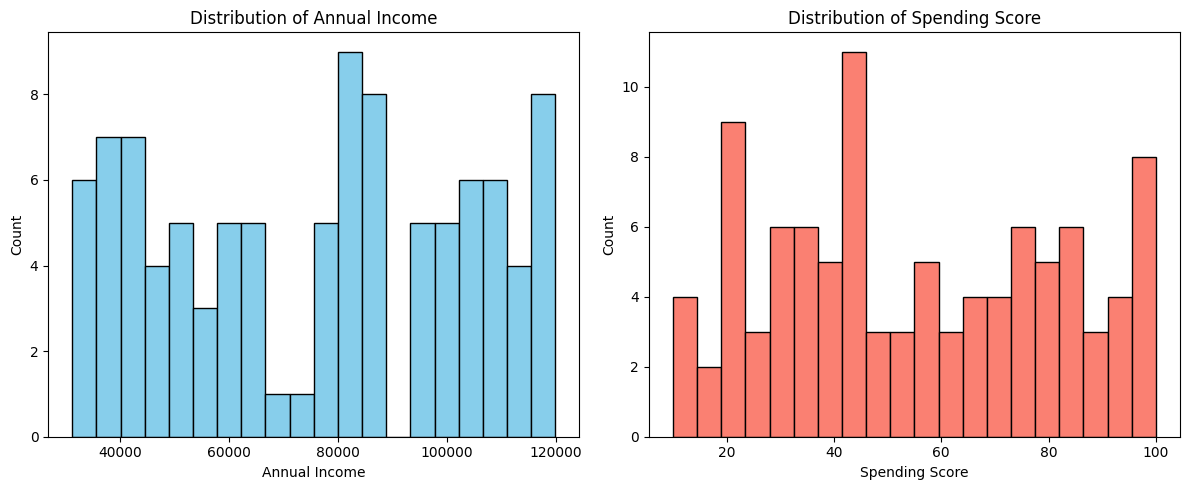

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['annual_income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(df['spending_score'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [13]:
high_avg=df.groupby('city')['spending_score'].mean().reset_index()
high_avg=high_avg.sort_values(by='spending_score',ascending=False)
high_avg.head(1)

,city,spending_score
2,HOUSTON,63.571429


#### Part C

In [14]:
num_70=(df['spending_score']>70).sum()
total_probability=len(df)
probability=num_70/total_probability
print(probability)
print(probability*100,"%")

0.35
35.0 %


In [15]:
high_annual = df[df['city'] == 'NEW YORK']
total=len(high_annual)
high_income=(high_annual['annual_income']>60000).sum()
conditional=high_income/total
print(conditional)


0.9


#### Part D

In [16]:
import numpy as np
age_vector=df['age'].to_numpy()
annual_vector=df['annual_income'].to_numpy()
DotProduct=np.dot(age_vector,annual_vector)
print(DotProduct)

320139613


In [17]:
annual_norm=df['annual_income'].to_numpy()
norm=np.linalg.norm(annual_norm)
print(norm)

809656.3090960262


In [18]:
annual_vector = df['annual_income'].to_numpy()
annual_unit = annual_vector / np.linalg.norm(annual_vector)
print(annual_vector)

[ 95726  40492  36102  80336 115314  56641  64584  62745  53093  96105
  81885  66631 102991  34014  41093  48070  65777  86958 112074  40729
  75017  96320  57751 108069  84748  35801  49190  79689  80993  59592
  40647  38716 118891 117545 119912 100316  32368 107575  36655 100031
 106429 117922  85766  43403  62097 108657  40966  82921  79726  80300
  52677  85609  86661  61024 100313  83006  45338  98027 110135  49508
  33051  78747 117142 117235  84021  96412  88335  86179  62093  99678
 110738  69734 102615 103523  47019 113613 116672 103847 112750 109634
  58251  55945  62217  38308  35949  81990  31150 119480 104740  96617
  46896  76175  37805  35237  50056  75543  86556  33343  43500  83222]


#### Part E

In [19]:
y = df["spending_score"].values

y_pred = y + np.random.normal(0, 5, size=len(y))

m = len(y)
J = (1 / (2 * m)) * np.sum((y - y_pred) ** 2)
print("Cost function J(w):", J)


gradient = (1 / m) * (y_pred - y)
print("Gradient (first 10 values):")
print(gradient[:10])



Cost function J(w): 9.406048619023567
Gradient (first 10 values):
[-0.02492626  0.0480063   0.01068325 -0.0325219   0.02965597  0.01813938
  0.02668454  0.0211038  -0.01726371  0.019602  ]


#### Part F

In [20]:
df['avg_spend_per_transaction']=df['spending_score']/df['num_transactions']
df['avg_spend_per_transaction'].head()

0    3.476190
1    3.000000
2    2.689655
3    1.192308
4    4.470588
Name: avg_spend_per_transaction, dtype: float64

In [21]:
df_encoded = pd.get_dummies(df, columns=['city'], prefix='city')
df_encoded.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,first_name,avg_spend_per_transaction,city_BOSTON,city_CHICAGO,city_HOUSTON,city_LOS ANGELES,city_MIAMI,city_NEW YORK,city_PHOENIX,city_SEATTLE
0,1001,Emily Martin,45,95726,73,21,58,Emily,3.476190,False,False,False,False,True,False,False,False
1,1002,Patricia Hernandez,22,40492,72,24,28,Patricia,3.000000,False,False,False,False,False,False,True,False
2,1003,Michael Miller,38,36102,78,29,36,Michael,2.689655,False,True,False,False,False,False,False,False
3,1004,Elizabeth Hernandez,39,80336,31,26,26,Elizabeth,1.192308,False,True,False,False,False,False,False,False
4,1005,Sophia Williams,51,115314,76,17,8,Sophia,4.470588,False,True,False,False,False,False,False,False


In [22]:
mean_age = df['age'].mean()
std_age = df['age'].std()
df['age'] = (df['age'] - mean_age) / std_age

mean_income = df['annual_income'].mean()
std_income = df['annual_income'].std()
df['annual_income'] = (df['annual_income'] - mean_income) / std_income

df.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name,avg_spend_per_transaction
0,1001,Emily Martin,0.197237,0.705592,73,21,58,MIAMI,Emily,3.476190
1,1002,Patricia Hernandez,-1.741419,-1.277839,72,24,28,PHOENIX,Patricia,3.000000
2,1003,Michael Miller,-0.392788,-1.435482,78,29,36,CHICAGO,Michael,2.689655
3,1004,Elizabeth Hernandez,-0.308499,0.152943,31,26,26,CHICAGO,Elizabeth,1.192308
4,1005,Sophia Williams,0.702973,1.408989,76,17,8,CHICAGO,Sophia,4.470588


#### Skewness of the numerical columns

In [23]:
num_cols = df.select_dtypes(include='number').columns
print("Numeric columns:", num_cols.tolist())


Numeric columns: ['customer_id', 'age', 'annual_income', 'spending_score', 'num_transactions', 'last_purchase_days', 'avg_spend_per_transaction']


In [24]:
df[['age','annual_income','spending_score','num_transactions','last_purchase_days']].skew()

age                  -0.404165
annual_income        -0.066712
spending_score        0.130000
num_transactions      0.196367
last_purchase_days   -0.006281
dtype: float64

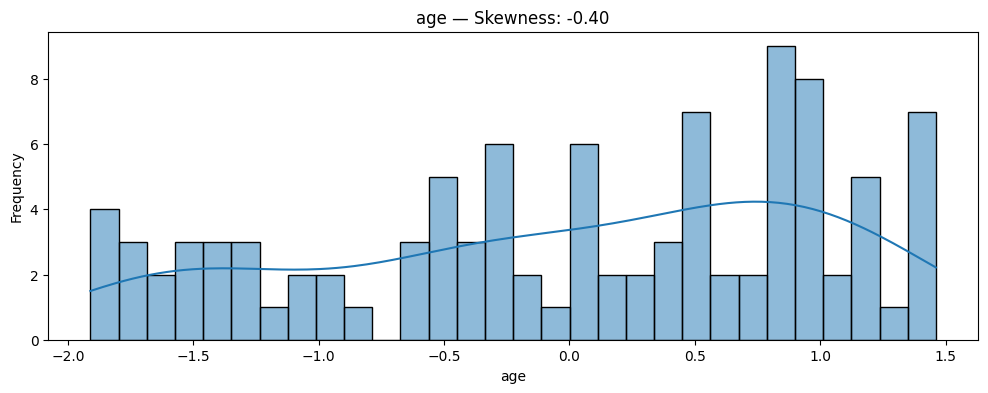

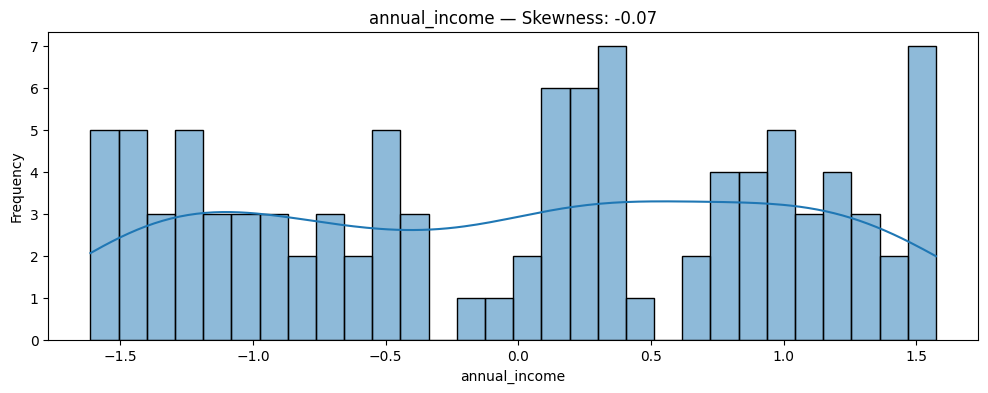

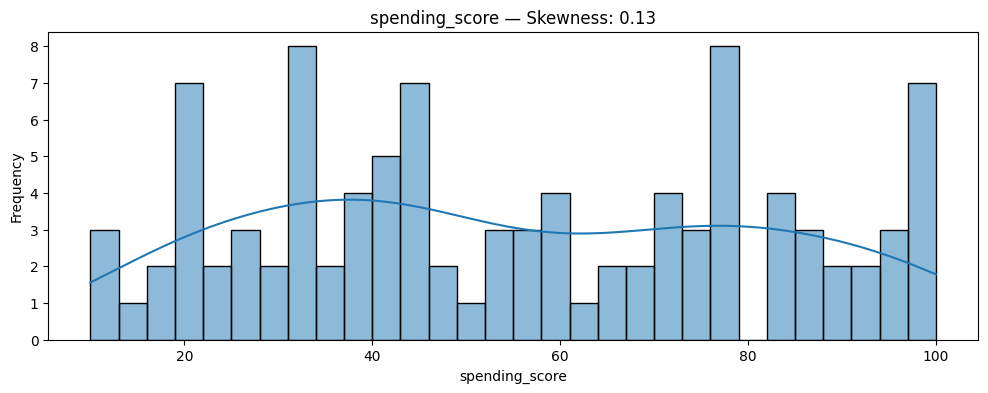

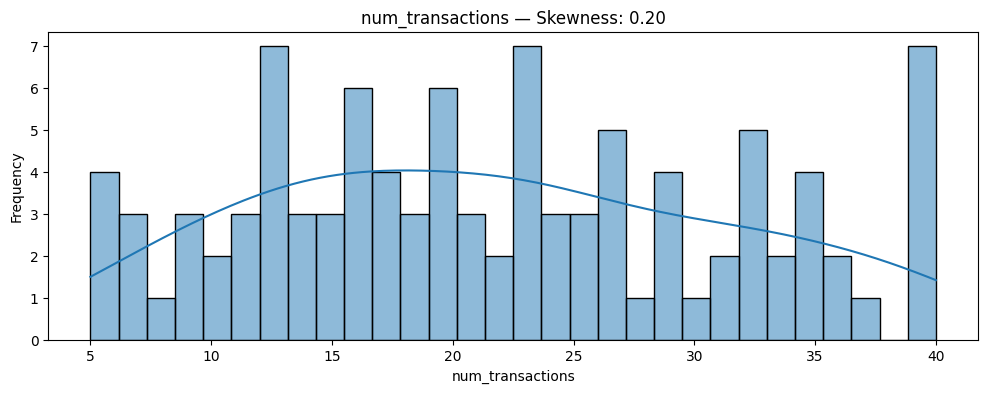

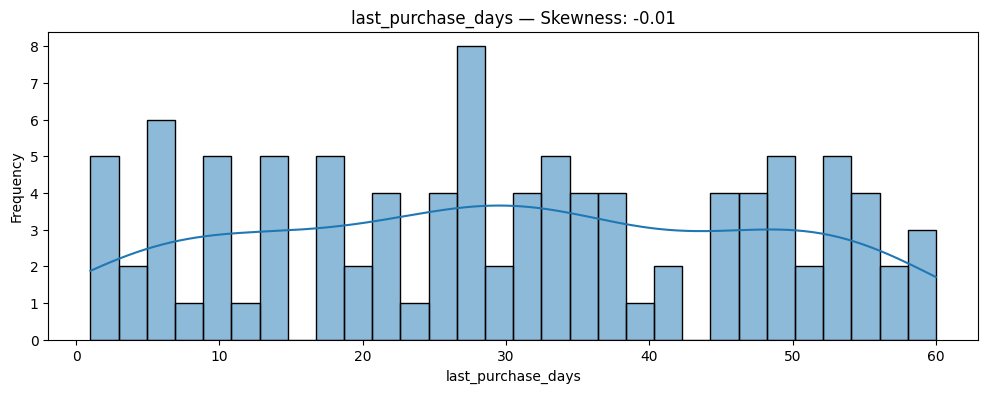

In [25]:
cols = ['age', 'annual_income', 'spending_score', 'num_transactions', 'last_purchase_days']

for col in cols:
    plt.figure(figsize=(12,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} — Skewness: {df[col].skew():.2f}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


#### Correlation

In [27]:
corr = df[['age', 'annual_income', 'spending_score', 'num_transactions', 'last_purchase_days']].corr()
corr


,age,annual_income,spending_score,num_transactions,last_purchase_days
age,1.000000,-0.134659,0.151477,-0.116168,0.113269
annual_income,-0.134659,1.000000,0.020770,-0.013415,0.010983
spending_score,0.151477,0.020770,1.000000,-0.234692,-0.000959
num_transactions,-0.116168,-0.013415,-0.234692,1.000000,-0.023805
last_purchase_days,0.113269,0.010983,-0.000959,-0.023805,1.000000


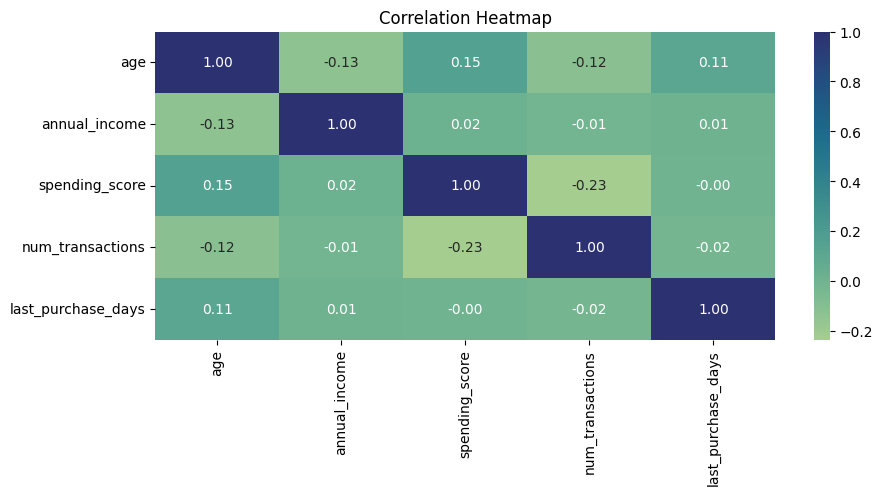

In [30]:
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()